## MI-DDW - Text Mining

### NLTK

## Read dataset

In [15]:
! pip3 install nltk
! pip3 install numpy
! pip3 install gensim
# ! pip install twython

In [16]:
import nltk
from collections import Counter
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.util import *
from nltk.sentiment import SentimentIntensityAnalyzer
import gensim
from gensim.models import Word2Vec


### Task part 1
Perform following Text Mining/NLP tasks over the data (per sen)
* sentence splitting
* tokenization
* stemming and lemmatization
* part of speech tagging
* entity recognition
* sentiment analysis
* train word2vec model

In [17]:
# Sentence splitting
def sentence_splitting(text):
    sentences = nltk.sent_tokenize(text)
    return sentences

# Tokenization
def tokens(sentences):
    tokens = nltk.word_tokenize(sent)
    return tokens

# Stemming
def stemming(tokens):
    stemmer = PorterStemmer()
    stems = [stemmer.stem(token) for token in tokens]
    return stems

# Lemmatization
def lemmatization(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmas

# Part-Of-Speech Tagging
def part_of_speech(text):
    sentences = nltk.sent_tokenize(text)
    tokens = [nltk.word_tokenize(sent) for sent in sentences]
    tagged = [nltk.pos_tag(sent) for sent in tokens]
    return tagged

# Entity Recognition
def entity_recognition(tokens):
    tokens = nltk.word_tokenize(tokens)
    tagged = nltk.pos_tag(tokens)
    ne_chunked = nltk.ne_chunk(tagged, binary=True)
    return ne_chunked
    
# ExctractEntities    
def extract_entities(ne_chunked):
    data = {}
    for entity in ne_chunked:
        if isinstance(entity, nltk.tree.Tree):
            text = " ".join([word for word, tag in entity.leaves()])
            ent = entity.label()
            data[text] = ent
        else:
            continue
    return data

# Sentiment Analysis
def sentiment_analysis(text):
    vader_analyzer = SentimentIntensityAnalyzer()
    return vader_analyzer.polarity_scores(text)

# Word2Vec
def word2vec():
    # Create CBOW model 
    data = brown.sents()
    cbow_model = gensim.models.Word2Vec(data, min_count = 5, size = 100, window = 5, workers=10) 
    # Create Skip Gram model 
    sg_model = gensim.models.Word2Vec(data, min_count = 5, size = 100, window = 5, sg = 1, workers=10)
    return (cbow_model, sg_model)

In [18]:
f = open("dataset.csv", "r")
text = f.read()

## Task 2
Provide statistics about your text/sentences (positive/negative):
* top tokens (before/after preprocessing steps)
* top lemmas/stems
* top nouns/verbs
* top entities and types
* top sentences according to the identified sentiment
* identify similar words using the word2vec model

In [19]:
# tokenCounts
def tokenCounts(arr):
    counts = Counter(arr)
    return sorted(counts.items(), key=lambda count: count[1], reverse=True)

from nltk.corpus import stopwords
from string import punctuation
# StopWords
def removeStopwords(tokens):
    stops = stopwords.words('english')
    filtered_tokens = [token for token in tokens if token not in stops]
    return filtered_tokens

from string import punctuation
def removePunction(tokens):
    nopunc_tokens = [token for token in tokens if token not in punctuation]
    return nopunc_tokens

### Top tokens before and after preprocessing

In [20]:
sentences = sentence_splitting(text)
tokens = tokens = nltk.word_tokenize(text)
print("Top tokens before processing:")
print(tokenCounts(tokens)[:25])

filtered_tokens = removeStopwords(tokens)
nopunc_tokens = removePunction(filtered_tokens)
print("Top tokens after processing:")
print(tokenCounts(nopunc_tokens)[:15])

Top tokens before processing:
[('.', 3375), ('XXXX', 3051), ('I', 2974), ('the', 2908), ('to', 2778), ('and', 2119), (',', 2033), ('my', 1606), ('a', 1483), ('of', 1295), ('that', 1136), ('was', 1089), ('have', 833), ('in', 825), ('on', 802), ('not', 769), ('me', 740), ('is', 725), ('they', 718), ('for', 692), ('this', 679), ('with', 659), ('it', 548), ('XX/XX/XXXX', 548), ('credit', 538)]
Top tokens after processing:
[('XXXX', 3051), ('I', 2974), ('XX/XX/XXXX', 548), ('credit', 538), ('account', 484), ('payment', 261), ('report', 260), ('would', 259), ('information', 254), ('The', 243), ('received', 237), ('told', 232), ("n't", 215), ('debt', 207), ('``', 198)]


### Top lemmas/stems

In [22]:
lemmas = lemmatization(nopunc_tokens)
print("Top lemmas:")
print(tokenCounts(lemmas)[:15])

stems = stemming(nopunc_tokens)
print("Top stems:")
print(tokenCounts(stems)[:15])

Top lemmas:
[('XXXX', 3051), ('I', 2974), ('account', 582), ('XX/XX/XXXX', 548), ('credit', 542), ('payment', 440), ('report', 294), ('would', 259), ('information', 254), ('The', 243), ('received', 237), ('told', 232), ('time', 225), ("n't", 215), ('company', 215)]
Top stems:
[('xxxx', 3051), ('I', 2974), ('account', 631), ('credit', 618), ('report', 553), ('xx/xx/xxxx', 548), ('payment', 451), ('call', 426), ('receiv', 318), ('inform', 310), ('the', 265), ('would', 264), ('bank', 237), ('time', 235), ('told', 235)]


### Top nouns/verbs

In [23]:
verbs = []
nouns = []
for sentence in part_of_speech(text):
    sentence_verbs = [word[0] for word in sentence if word[1].lower().startswith('vb')]
    for verb in sentence_verbs:
        verbs.append(verb)
        
    sentence_nouns = [word[0] for word in sentence if word[1].lower().startswith('nn')]
    for noun in sentence_nouns:
        nouns.append(noun)
print("Top verbs:")
print(tokenCounts(verbs)[:15])
print("Top nouns:")
print(tokenCounts(nouns)[:15])

Top verbs:
[('was', 1089), ('have', 833), ('is', 725), ('be', 373), ('had', 326), ('has', 257), ('been', 255), ('are', 251), ('received', 237), ('told', 230), ('do', 225), ('did', 223), ('am', 197), ('said', 183), ('were', 182)]
Top nouns:
[('XXXX', 2849), ('credit', 538), ('XX/XX/XXXX', 501), ('account', 478), ('payment', 261), ('information', 254), ('report', 230), ('debt', 207), ('company', 192), ('payments', 179), ('time', 158), ('loan', 155), ('letter', 148), ('phone', 140), ('card', 124)]


## Top entities

In [24]:
print("Top entities:")
ne_chucked = entity_recognition(text)
print(extract_entities(ne_chucked))

Top entities:
{'Discover Card': 'NE', 'Credit Card Purchase': 'NE', 'XXXX XXXX': 'NE', 'XXXX': 'NE', 'Carrington': 'NE', 'RMAs': 'NE', 'Child Support': 'NE', 'Experian': 'NE', 'Harris': 'NE', 'Weeks': 'NE', 'SUNTRUST': 'NE', 'XXXX of': 'NE', 'XXXX Billing': 'NE', 'Social Security': 'NE', 'ChexSystems XXXX': 'NE', 'PNC Bank': 'NE', 'PNC': 'NE', 'areasHSBC': 'NE', 'HSBC': 'NE', 'MrXXXX': 'NE', 'MrXXXX XXXX': 'NE', 'HAMP': 'NE', 'Homes Affordable': 'NE', 'CFPB': 'NE', 'FSA': 'NE', 'Sams Club': 'NE', 'Synchrony Bank': 'NE', 'Chase': 'NE', 'Credit': 'NE', 'Navient': 'NE', 'FCRA': 'NE', 'Credit Solutions': 'NE', 'RCS': 'NE', 'Harvey': 'NE', 'Bank': 'NE', 'America': 'NE', 'Americas': 'NE', 'FHA': 'NE', 'USPS': 'NE', 'Equifax': 'NE', 'SPS': 'NE', 'MONTHS': 'NE', 'Citi': 'NE', 'XXXX Thank': 'NE', 'Diversified Consultants': 'NE', 'CREDIT': 'NE', 'National Recovery': 'NE', 'Business': 'NE', 'Renton Collections': 'NE', 'Brclysbank DE': 'NE', 'Accelerated Receivables MG': 'NE', 'Accelerated Receiva

### Overall sentiment

In [25]:
print(sentiment_analysis(text))

{'neg': 0.091, 'neu': 0.823, 'pos': 0.086, 'compound': -0.9999}


### Word2Vec

In [27]:
from nltk.corpus import brown
(cbow_model, sg_model) = word2vec()

In [28]:
cbow_model.wv.most_similar("dissatisfied", topn=3)

[('Whenever', 0.9384173154830933),
 ('frightful', 0.9346892833709717),
 ('ignored', 0.9299069046974182)]

In [29]:
sg_model.wv.most_similar("nice", topn=3)

[('awfully', 0.9143247604370117),
 ('sad', 0.912736177444458),
 ('pleasant', 0.9046118259429932)]

### WordClouds

In [30]:
! pip3 install wordcloud Image matplotlib

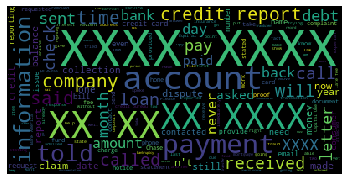

In [31]:
%matplotlib inline
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(text)

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()